# Лабораторная работа №5
## Ансамбли моделей машинного обучения
### Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from gmdhpy import gmdh
from sklearn.metrics import roc_auc_score

In [2]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

### Загрузка данных:
В качестве набора данных используется готовый набор данных из лабораторной работы №3 [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/) в котором уже произведена обработка пропусков в данных, кодирование категориальных признаков и масштабирование данных.

In [3]:
data = pd.read_csv('D:/Загрузки/IEEE-CIS Fraud Detection/newdone_train.csv', sep=",")
data.drop(['Unnamed: 0'], inplace=True, axis=1)

### Разделение выборки на обучающую и тестовую:
С использованием метода train_test_split.

In [4]:
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('isFraud')], data['isFraud'], random_state=1)
del data

### Обучение моделей:
Модель "Случайный лес"

In [5]:
RF = RandomForestClassifier(random_state=1)
RF.fit(data_train, data_y_train)

RandomForestClassifier(random_state=1)

In [6]:
data_test_predicted = {}
data_test_predicted["RF"] = roc_auc_score(data_y_test, RF.predict_proba(data_test)[:,1])

Модель "Сверхслучайные деревья"

In [7]:
ET = ExtraTreesClassifier(random_state=1)
ET.fit(data_train, data_y_train)
data_test_predicted["ET"] = roc_auc_score(data_y_test, ET.predict_proba(data_test)[:,1])

Модели "Градиентный бустинг"

In [8]:
GB = GradientBoostingClassifier(random_state=1)
GB.fit(data_train, data_y_train)
data_test_predicted["GB"] = roc_auc_score(data_y_test, GB.predict_proba(data_test)[:,1])

In [9]:
GB_CB = CatBoostClassifier()
GB_CB.fit(data_train, data_y_train)
data_test_predicted["GB_CB"] = roc_auc_score(data_y_test, GB_CB.predict_proba(data_test)[:,1])

Learning rate set to 0.138966
0:	learn: 0.4908057	total: 285ms	remaining: 4m 44s
1:	learn: 0.3625994	total: 403ms	remaining: 3m 21s
2:	learn: 0.2744751	total: 547ms	remaining: 3m 1s
3:	learn: 0.2221522	total: 730ms	remaining: 3m 1s
4:	learn: 0.1877148	total: 961ms	remaining: 3m 11s
5:	learn: 0.1634522	total: 1.18s	remaining: 3m 14s
6:	learn: 0.1467737	total: 1.41s	remaining: 3m 20s
7:	learn: 0.1369372	total: 1.61s	remaining: 3m 20s
8:	learn: 0.1295377	total: 1.84s	remaining: 3m 23s
9:	learn: 0.1241591	total: 2.09s	remaining: 3m 26s
10:	learn: 0.1201690	total: 2.33s	remaining: 3m 29s
11:	learn: 0.1163576	total: 2.52s	remaining: 3m 27s
12:	learn: 0.1139235	total: 2.73s	remaining: 3m 27s
13:	learn: 0.1115860	total: 2.9s	remaining: 3m 24s
14:	learn: 0.1096261	total: 3.15s	remaining: 3m 26s
15:	learn: 0.1087205	total: 3.28s	remaining: 3m 21s
16:	learn: 0.1077087	total: 3.44s	remaining: 3m 19s
17:	learn: 0.1064933	total: 3.65s	remaining: 3m 19s
18:	learn: 0.1060886	total: 3.8s	remaining: 3m 

158:	learn: 0.0849218	total: 23.8s	remaining: 2m 6s
159:	learn: 0.0848464	total: 24s	remaining: 2m 5s
160:	learn: 0.0847684	total: 24.1s	remaining: 2m 5s
161:	learn: 0.0847051	total: 24.3s	remaining: 2m 5s
162:	learn: 0.0846219	total: 24.4s	remaining: 2m 5s
163:	learn: 0.0843422	total: 24.6s	remaining: 2m 5s
164:	learn: 0.0842813	total: 24.8s	remaining: 2m 5s
165:	learn: 0.0842360	total: 25s	remaining: 2m 5s
166:	learn: 0.0841870	total: 25.1s	remaining: 2m 5s
167:	learn: 0.0841050	total: 25.3s	remaining: 2m 5s
168:	learn: 0.0840307	total: 25.5s	remaining: 2m 5s
169:	learn: 0.0839692	total: 25.7s	remaining: 2m 5s
170:	learn: 0.0838920	total: 25.9s	remaining: 2m 5s
171:	learn: 0.0838282	total: 26s	remaining: 2m 5s
172:	learn: 0.0837542	total: 26.2s	remaining: 2m 5s
173:	learn: 0.0836762	total: 26.3s	remaining: 2m 4s
174:	learn: 0.0836318	total: 26.5s	remaining: 2m 4s
175:	learn: 0.0835787	total: 26.7s	remaining: 2m 4s
176:	learn: 0.0835654	total: 26.8s	remaining: 2m 4s
177:	learn: 0.0834

316:	learn: 0.0769088	total: 46.7s	remaining: 1m 40s
317:	learn: 0.0768615	total: 46.8s	remaining: 1m 40s
318:	learn: 0.0767933	total: 47s	remaining: 1m 40s
319:	learn: 0.0767545	total: 47.1s	remaining: 1m 40s
320:	learn: 0.0767173	total: 47.3s	remaining: 1m 39s
321:	learn: 0.0766846	total: 47.4s	remaining: 1m 39s
322:	learn: 0.0766738	total: 47.6s	remaining: 1m 39s
323:	learn: 0.0766530	total: 47.7s	remaining: 1m 39s
324:	learn: 0.0766049	total: 47.8s	remaining: 1m 39s
325:	learn: 0.0765826	total: 48s	remaining: 1m 39s
326:	learn: 0.0765820	total: 48.1s	remaining: 1m 39s
327:	learn: 0.0765774	total: 48.2s	remaining: 1m 38s
328:	learn: 0.0765142	total: 48.4s	remaining: 1m 38s
329:	learn: 0.0764397	total: 48.5s	remaining: 1m 38s
330:	learn: 0.0763961	total: 48.6s	remaining: 1m 38s
331:	learn: 0.0763696	total: 48.8s	remaining: 1m 38s
332:	learn: 0.0763496	total: 49s	remaining: 1m 38s
333:	learn: 0.0763161	total: 49.2s	remaining: 1m 38s
334:	learn: 0.0762700	total: 49.3s	remaining: 1m 37s

472:	learn: 0.0720617	total: 1m 8s	remaining: 1m 16s
473:	learn: 0.0720131	total: 1m 8s	remaining: 1m 16s
474:	learn: 0.0719791	total: 1m 8s	remaining: 1m 16s
475:	learn: 0.0719463	total: 1m 9s	remaining: 1m 16s
476:	learn: 0.0719305	total: 1m 9s	remaining: 1m 15s
477:	learn: 0.0719144	total: 1m 9s	remaining: 1m 15s
478:	learn: 0.0718883	total: 1m 9s	remaining: 1m 15s
479:	learn: 0.0718530	total: 1m 9s	remaining: 1m 15s
480:	learn: 0.0718453	total: 1m 9s	remaining: 1m 15s
481:	learn: 0.0718207	total: 1m 9s	remaining: 1m 15s
482:	learn: 0.0718074	total: 1m 10s	remaining: 1m 14s
483:	learn: 0.0717799	total: 1m 10s	remaining: 1m 14s
484:	learn: 0.0717615	total: 1m 10s	remaining: 1m 14s
485:	learn: 0.0717467	total: 1m 10s	remaining: 1m 14s
486:	learn: 0.0717359	total: 1m 10s	remaining: 1m 14s
487:	learn: 0.0717132	total: 1m 10s	remaining: 1m 14s
488:	learn: 0.0716808	total: 1m 10s	remaining: 1m 13s
489:	learn: 0.0716613	total: 1m 10s	remaining: 1m 13s
490:	learn: 0.0716071	total: 1m 11s	re

628:	learn: 0.0686033	total: 1m 30s	remaining: 53.2s
629:	learn: 0.0685812	total: 1m 30s	remaining: 53s
630:	learn: 0.0685452	total: 1m 30s	remaining: 52.9s
631:	learn: 0.0685339	total: 1m 30s	remaining: 52.7s
632:	learn: 0.0684976	total: 1m 30s	remaining: 52.6s
633:	learn: 0.0684973	total: 1m 30s	remaining: 52.5s
634:	learn: 0.0684807	total: 1m 31s	remaining: 52.3s
635:	learn: 0.0684664	total: 1m 31s	remaining: 52.2s
636:	learn: 0.0684448	total: 1m 31s	remaining: 52.1s
637:	learn: 0.0683810	total: 1m 31s	remaining: 51.9s
638:	learn: 0.0683632	total: 1m 31s	remaining: 51.8s
639:	learn: 0.0683445	total: 1m 31s	remaining: 51.6s
640:	learn: 0.0683082	total: 1m 31s	remaining: 51.5s
641:	learn: 0.0682981	total: 1m 32s	remaining: 51.3s
642:	learn: 0.0682901	total: 1m 32s	remaining: 51.2s
643:	learn: 0.0682528	total: 1m 32s	remaining: 51.1s
644:	learn: 0.0682435	total: 1m 32s	remaining: 50.9s
645:	learn: 0.0682155	total: 1m 32s	remaining: 50.8s
646:	learn: 0.0682049	total: 1m 32s	remaining: 5

784:	learn: 0.0653495	total: 1m 51s	remaining: 30.7s
785:	learn: 0.0653352	total: 1m 52s	remaining: 30.5s
786:	learn: 0.0653145	total: 1m 52s	remaining: 30.4s
787:	learn: 0.0652986	total: 1m 52s	remaining: 30.2s
788:	learn: 0.0652752	total: 1m 52s	remaining: 30.1s
789:	learn: 0.0652657	total: 1m 52s	remaining: 29.9s
790:	learn: 0.0652323	total: 1m 52s	remaining: 29.8s
791:	learn: 0.0652097	total: 1m 52s	remaining: 29.6s
792:	learn: 0.0651874	total: 1m 53s	remaining: 29.5s
793:	learn: 0.0651775	total: 1m 53s	remaining: 29.4s
794:	learn: 0.0651605	total: 1m 53s	remaining: 29.2s
795:	learn: 0.0651476	total: 1m 53s	remaining: 29.1s
796:	learn: 0.0651448	total: 1m 53s	remaining: 29s
797:	learn: 0.0651400	total: 1m 53s	remaining: 28.8s
798:	learn: 0.0651219	total: 1m 54s	remaining: 28.7s
799:	learn: 0.0651041	total: 1m 54s	remaining: 28.6s
800:	learn: 0.0650957	total: 1m 54s	remaining: 28.4s
801:	learn: 0.0650955	total: 1m 54s	remaining: 28.3s
802:	learn: 0.0650907	total: 1m 54s	remaining: 2

942:	learn: 0.0627276	total: 2m 14s	remaining: 8.12s
943:	learn: 0.0627098	total: 2m 14s	remaining: 7.98s
944:	learn: 0.0626722	total: 2m 14s	remaining: 7.84s
945:	learn: 0.0626549	total: 2m 14s	remaining: 7.7s
946:	learn: 0.0626193	total: 2m 14s	remaining: 7.55s
947:	learn: 0.0626018	total: 2m 15s	remaining: 7.41s
948:	learn: 0.0625910	total: 2m 15s	remaining: 7.27s
949:	learn: 0.0625894	total: 2m 15s	remaining: 7.12s
950:	learn: 0.0625643	total: 2m 15s	remaining: 6.98s
951:	learn: 0.0625608	total: 2m 15s	remaining: 6.84s
952:	learn: 0.0625323	total: 2m 15s	remaining: 6.7s
953:	learn: 0.0625146	total: 2m 15s	remaining: 6.55s
954:	learn: 0.0625053	total: 2m 16s	remaining: 6.41s
955:	learn: 0.0624960	total: 2m 16s	remaining: 6.26s
956:	learn: 0.0624595	total: 2m 16s	remaining: 6.13s
957:	learn: 0.0624485	total: 2m 16s	remaining: 5.98s
958:	learn: 0.0624381	total: 2m 16s	remaining: 5.84s
959:	learn: 0.0624199	total: 2m 16s	remaining: 5.7s
960:	learn: 0.0624122	total: 2m 16s	remaining: 5.

In [10]:
LGBM = LGBMClassifier()
LGBM.fit(data_train, data_y_train)
data_test_predicted["LGBM"] = roc_auc_score(data_y_test, LGBM.predict_proba(data_test)[:,1])

In [11]:
XGB = XGBClassifier(n_estimators=500,
                    max_depth=9,
                    learning_rate=0.05,
                    subsample=0.9,
                    colsample_bytree=0.9,
                    tree_method='gpu_hist')
XGB.fit(data_train, data_y_train)
data_test_predicted["XGB"] = roc_auc_score(data_y_test, XGB.predict_proba(data_test)[:,1])

D:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Сравнение качества полученных моделей:

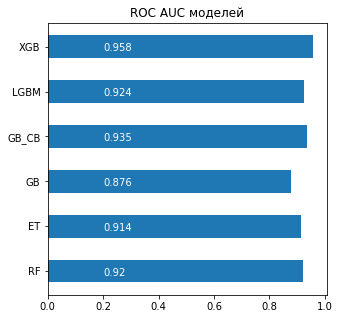

In [14]:
vis_models_quality(data_test_predicted.values(), list(data_test_predicted.keys()), 'ROC AUC моделей')